The following file provide the visualisation of all the results used here

In [1]:
import sys
sys.path.append('../../')
sys.path.append('../')

In [2]:
from codes.docs.analysis.nimagen import stats, visualisation
from codes.docs.analysis import data_preprocessing

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nibabel as nib
from collections import defaultdict

import time

# Visualising Draw EM atlas

In [4]:
full_legend = {int(k.replace('Imperial ','')):v['abbr'] for k,v in data_preprocessing.Volumes.Imperial.get_Imperial_legends().items()}
WM_labels = {k:v for k,v in full_legend.items() if 'WM' in v}
GM_labels = {k:v for k,v in full_legend.items() if 'GM' in v}
DGM_labels = {k:v for k,v in full_legend.items() if 'GM' not in v and 'WM' not in v}

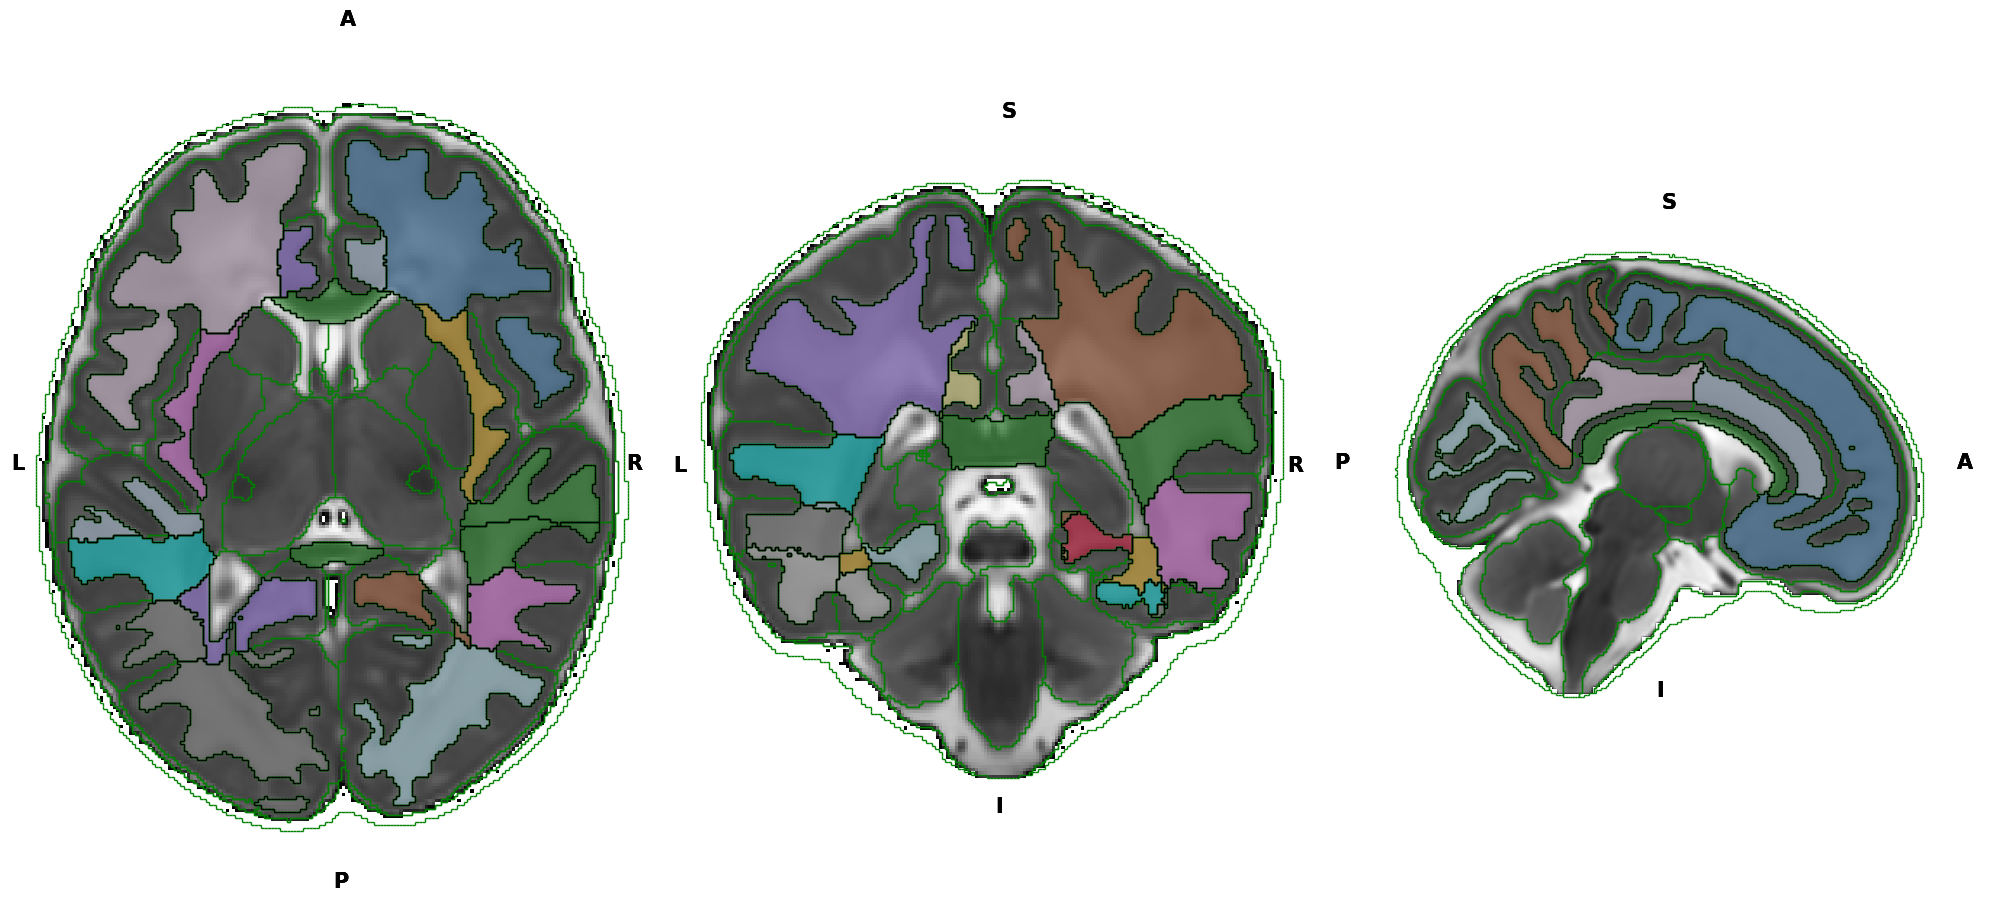

In [13]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(1,3)
axes1 = fig.add_subplot(gs[0:2, 0])
axes2 = fig.add_subplot(gs[0:2, 1])
axes3 = fig.add_subplot(gs[0:2, 2])

_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz',
    axes=[axes1,axes2,axes3],cmap='gray',T2=True,background_value=1)

_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide=[i for i in range(88)],
    outline_alpha=1,
    outline_colour='green',
    axes=[axes1,axes2,axes3])
_,test = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide={k:v for k,v in full_legend.items() if 'WM' not in v},
    label_legend=full_legend,
    cmap='tab20',
    axes=[axes1,axes2,axes3],
    image_alpha=.5,
    legends=False)
plt.tight_layout()
# plt.savefig('../../dataset/preprocessed_dataset/scz/example.png')

In [8]:
# white_matter_labels       = 51..82              # tissues: 3
# gray_matter_labels        = 5..16,20..39        # tissues: 2
# deep_gray_matter_labels   = 1..4,40..47,85..87  # tissues: 5,7,9
# lateral_ventricles_labels = 49,50
# corpus_callosum_labels    = 48
# inter_hemisphere_labels   = 40..47,85..87
# brainstem_labels          = 19
# cerebellum_labels         = 17,18


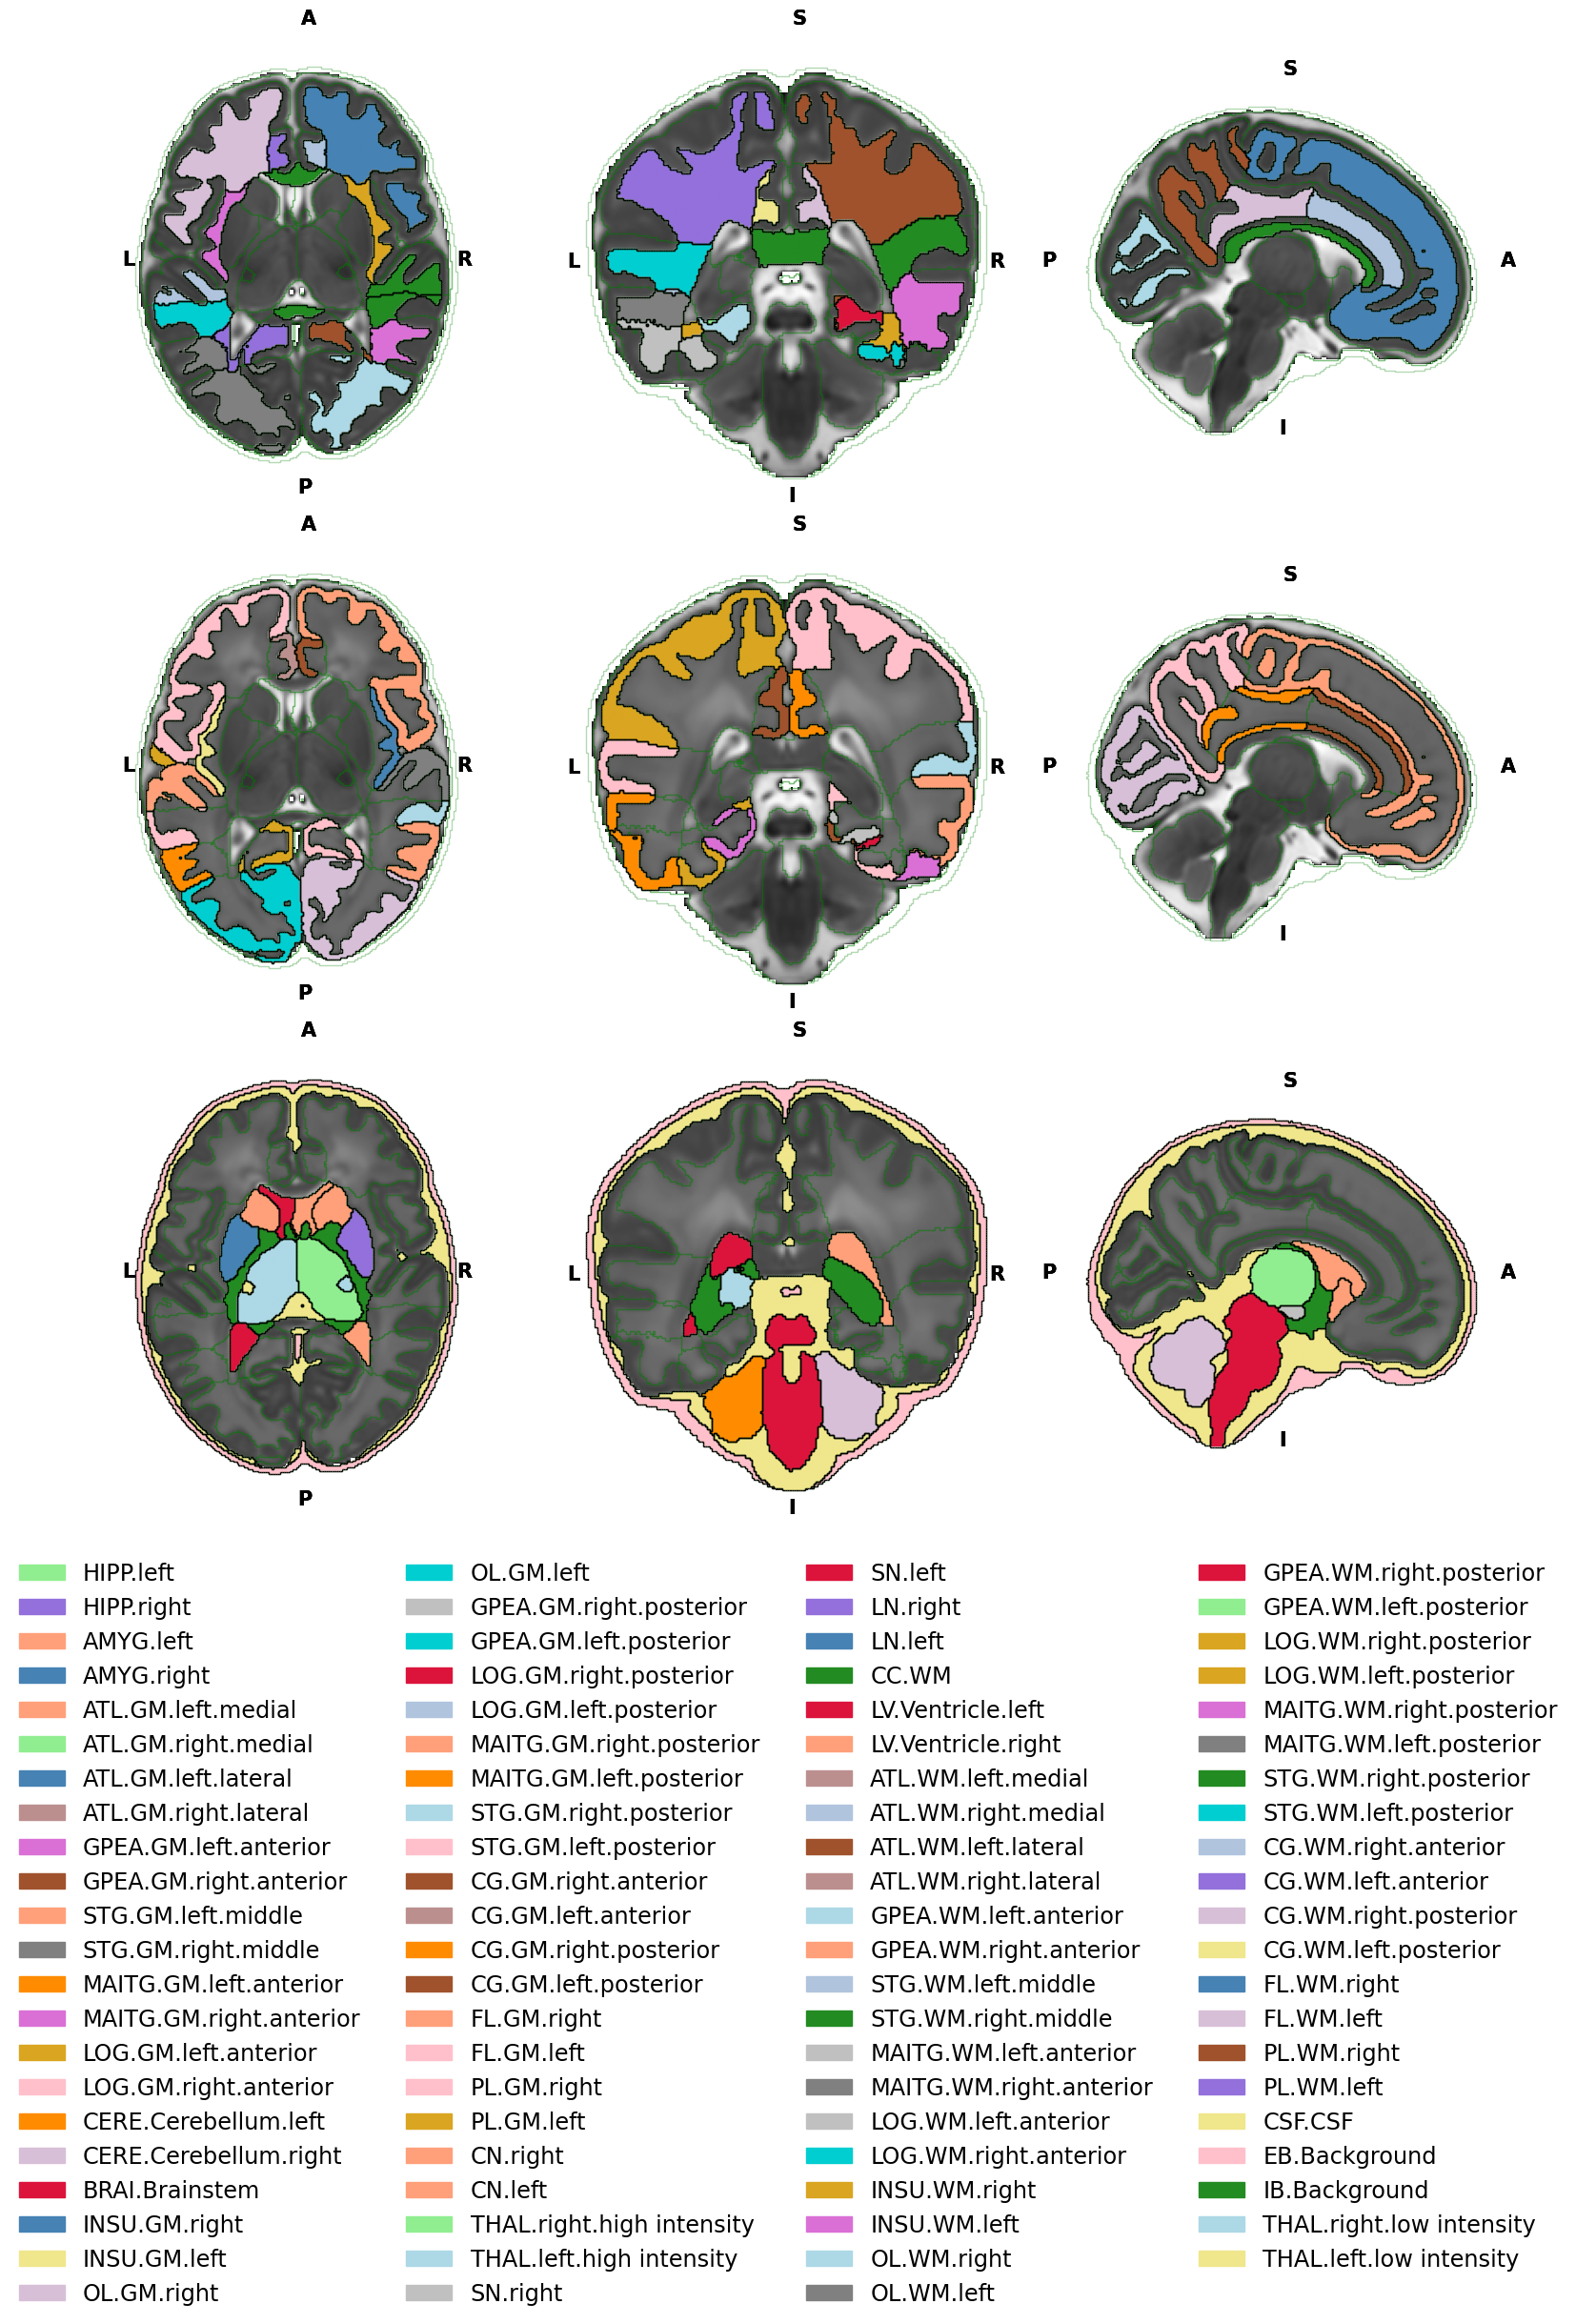

In [28]:
fig = plt.figure(figsize=(18,25))
gs = fig.add_gridspec(8,3)
axes1 = fig.add_subplot(gs[0:2, 0])
axes2 = fig.add_subplot(gs[0:2, 1])
axes3 = fig.add_subplot(gs[0:2, 2])
axes4 = fig.add_subplot(gs[2:4, 0])
axes5 = fig.add_subplot(gs[2:4, 1])
axes6 = fig.add_subplot(gs[2:4, 2])
axes7 = fig.add_subplot(gs[4:6, 0])
axes8 = fig.add_subplot(gs[4:6, 1])
axes9 = fig.add_subplot(gs[4:6, 2])
axes10 = fig.add_subplot(gs[6:8, :])
axes10.set_axis_off()
# WM
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz',
    axes=[axes1,axes2,axes3],cmap='gray',T2=True,background_value=1)
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide=[i for i in range(88)],
    outline_alpha=0.3,
    outline_colour='green',
    axes=[axes1,axes2,axes3])
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide={**GM_labels,**DGM_labels},
    label_legend=full_legend,
    cmap='tab20',
    axes=[axes1,axes2,axes3],
    legends=False)
# GM
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz',
    axes=[axes4,axes5,axes6],cmap='gray',T2=True,background_value=1)
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide=[i for i in range(88)],
    outline_alpha=0.3,
    outline_colour='green',
    axes=[axes4,axes5,axes6])
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide={**WM_labels,**DGM_labels},
    label_legend=full_legend,
    cmap='tab20',
    axes=[axes4,axes5,axes6],
    legends=False)
# DGM
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz',
    axes=[axes7,axes8,axes9],cmap='gray',T2=True,background_value=1)
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide=[i for i in range(88)],
    outline_alpha=0.3,
    outline_colour='green',
    axes=[axes7,axes8,axes9])
_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file='../../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz',
    regions_to_hide={**WM_labels,**GM_labels},
    label_legend=full_legend,
    cmap='tab20',
    axes=[axes7,axes8,axes9],
    legends=True,
    label_legend_axis=axes10,
    label_legend_loc='upper center',label_legend_bbox_to_anchor=None,label_legend_ncol=4,label_legend_fontsize='xx-large')
plt.tight_layout()
plt.savefig('../../dataset/preprocessed_dataset/scz/imperial_parcellations_test4.png')

# SCZ result

In [11]:
T2_file = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz'
drawem_parcellation = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz'

In [12]:
full_legend = {int(k.replace('Imperial ','')):v['abbr'] for k,v in data_preprocessing.Volumes.Imperial.get_Imperial_legends().items()}
WM_labels = {k:v for k,v in full_legend.items() if 'WM' in v}
GM_labels = {k:v for k,v in full_legend.items() if 'GM' in v}
DGM_labels = {k:v for k,v in full_legend.items() if 'GM' not in v and 'WM' not in v}

In this work, I examined only the GM and WM regions. I grouped the same segmented regions together to reduce the number of space I need to search

In [13]:
GM_WM_only = {k:v for k,v in data_preprocessing.Volumes.Imperial.get_Imperial_legends().items() if v['tissue'] is not None and ('WM' in v['tissue'] or 'GM' in v['tissue'])}

In [14]:
GM_WM_segmented_grouped = {int(k.replace('Imperial ','')):'.'.join(v['abbr'].split('.')[:-1]) if len(v['abbr'].split('.'))>3 else v['abbr']
                           for k,v in GM_WM_only.items()}

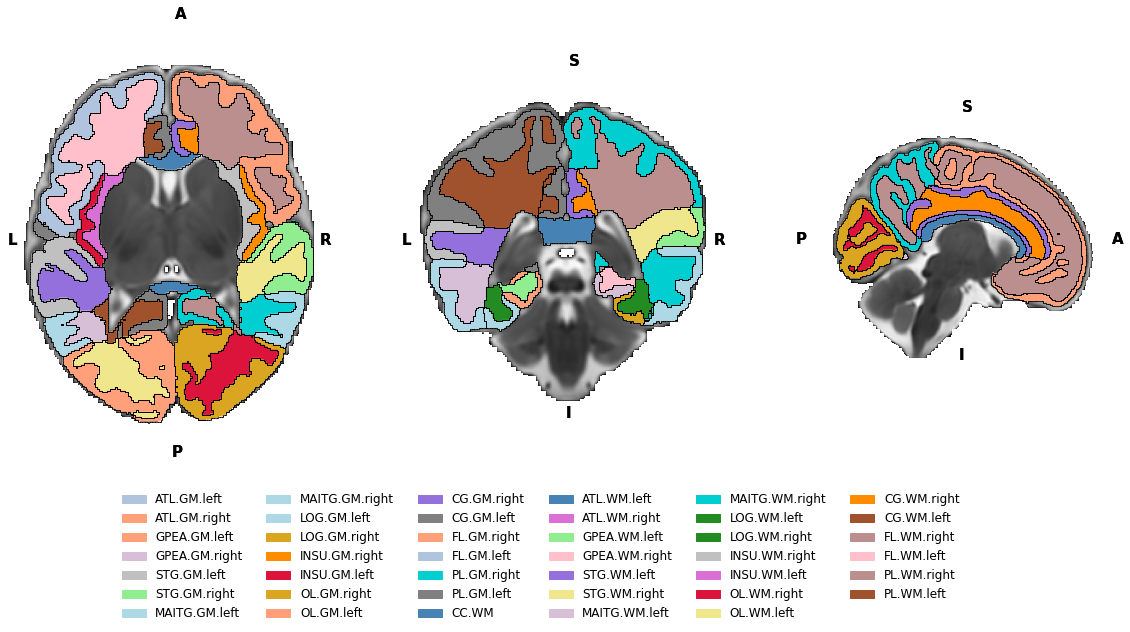

In [20]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(1,3)
axes1 = fig.add_subplot(gs[0:2, 0])
axes2 = fig.add_subplot(gs[0:2, 1])
axes3 = fig.add_subplot(gs[0:2, 2])

_,_ = visualisation.Brainmap.plot_segmentation(
    atlas_file=T2_file,
    axes=[axes1,axes2,axes3],cmap='gray',T2=True,background_value=1)
# _,_ = visualisation.Brainmap.plot_segmentation(
#     map_view=['all'],
#     label_legend=GM_WM_segmented_grouped,
#     atlas_file=drawem_parcellation,
#     outline_regions_to_hide=False,
#     image_alpha=0,
#     outline_alpha=1,
#     outline_colour='green',
#     axes=[axes1,axes2,axes3],legends=False)
_,_ = visualisation.Brainmap.plot_segmentation(
    map_view=['all'],
    label_legend=GM_WM_segmented_grouped,
    atlas_file=drawem_parcellation,
#     outline_regions_to_hide=False,
    image_alpha=1,
    cmap='tab20',
    outline_alpha=1,
    axes=[axes1,axes2,axes3],
    label_legend_loc='lower center',
    label_legend_bbox_to_anchor=(-1.15,-1,0.75,0),
    label_legend_ncol=6,
    label_legend_fontsize=12)
fig.savefig('scz/grouped_scz_segmented_atlas.png',dpi=300)

In [10]:
# #select only the values of interest to plot on the brain map
# euro_result_only_WM_GM = pd.read_csv('scz/SCZ_cohort_EUR_ld_EUR_stat_CORE_WM_GM_only.csv')
# euro_result_only_WM_GM = euro_result_only_WM_GM[euro_result_only_WM_GM['threshold'] == 'SCZ_PRS_Pt_0.001_LD_EUR_stat_core']
# euro_result_only_WM_GM = euro_result_only_WM_GM.loc[euro_result_only_WM_GM['Connection'].isin([f'Imperial {i}' for i in range(1,87)]),['Connection','PRS_coef','PRS_pval']].set_index('Connection').to_dict()

In [15]:
df_euro = pd.read_csv('scz/eur_cohort_segmented_scz_prs_all.csv')
df_mixed = pd.read_csv('scz/mixed_cohort_segmented_scz_prs_all.csv')


In [16]:
euro_result = stats.MassUnivariate.calculate_mass_univariate_across_multiple_thresholds(
df_euro,
    thresholds = [i for i in df_euro.columns if 'SCZ_PRS_Pt_0.001' in i and 'LD_EUR_stat_core' in i],
cat_independentVar_cols=['sex'],
cont_independentVar_cols=['GA','PMA','TBV']+[f'euro_Anc_PC{i}' for i in range(1,4)],
dependentVar_cols=[i for i in df_euro.columns if 'Imperial' in i])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


In [17]:
euro_result_only_WM_GM = data_preprocessing.Volumes.Imperial.get_segment(euro_result,tissue=['WM','GM'],col='Connection')

In [18]:
#select only the values of interest to plot on the brain map
euro_result_only_WM_GM = euro_result_only_WM_GM.loc[euro_result_only_WM_GM['Connection'].isin([f'Imperial {i}' for i in range(1,87)]),['Connection','PRS_coef','PRS_pval']].set_index('Connection').to_dict()

In [19]:
to_plot = {int(k.replace('Imperial ','')):v for k,v in euro_result_only_WM_GM['PRS_pval'].items()}
to_plot_new = defaultdict()

In [20]:
#since the result dictionary doesn't contain duplicated keys after segmentation grouped. e.g., 5 and 7 denote the same region.
#need to manually reverse, and assign the missing keys the same values as their complement so we can plot correctly.
GM_WM_only = {k:v for k,v in data_preprocessing.Volumes.Imperial.get_Imperial_legends().items() if v['tissue'] is not None and ('WM' in v['tissue'] or 'GM' in v['tissue'])}

GM_WM_segmented_grouped = {int(k.replace('Imperial ','')):'.'.join(v['abbr'].split('.')[:-1]) if len(v['abbr'].split('.'))>3 else v['abbr']
                           for k,v in GM_WM_only.items()}
GM_WM_segmented_grouped_reversed = defaultdict(list)
for k,v in GM_WM_segmented_grouped.items():
    GM_WM_segmented_grouped_reversed[v].append(k)
for k,v in GM_WM_segmented_grouped_reversed.items():
    for region_number in v:
        if region_number in to_plot:
            number_to_remember = to_plot[region_number]
    for region_number in v:
        to_plot_new[region_number] = number_to_remember

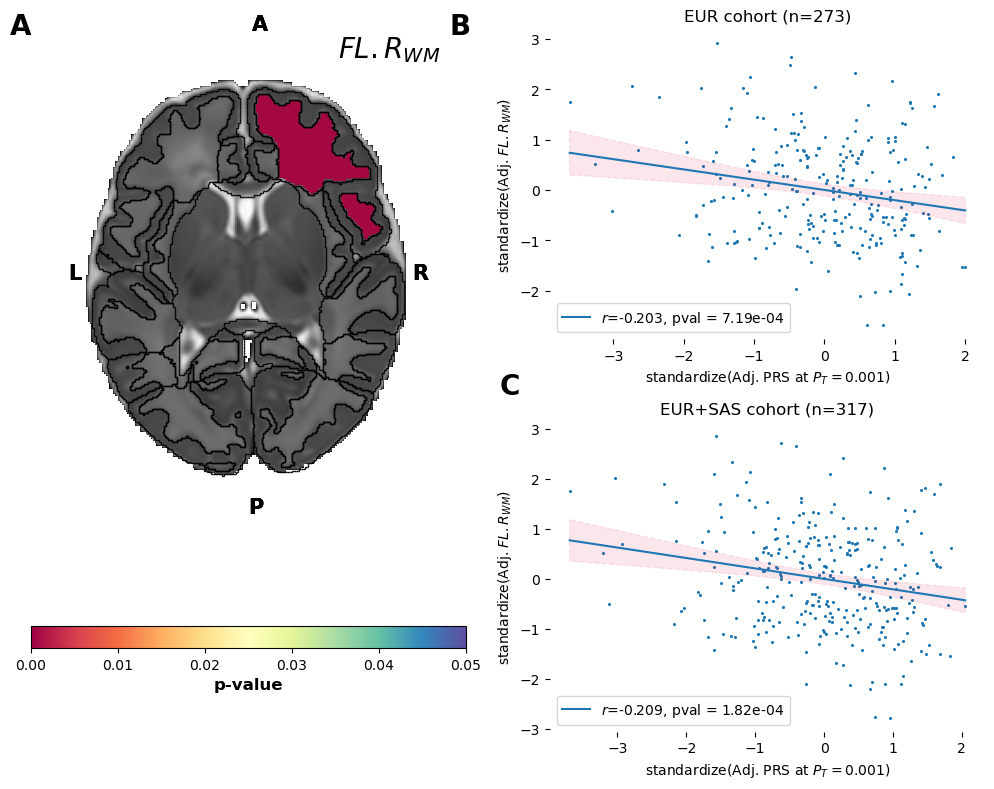

In [24]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(4,2)
axes1 = fig.add_subplot(gs[:, 0])
axes2 = fig.add_subplot(gs[0:2, 1])
axes3 = fig.add_subplot(gs[2:4, 1])

T2_file = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz'
drawem_parcellation = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz'
# atlas_slice=[150,150,150]
atlas_slice=108
map_view=['axial']
_,_ = visualisation.Brainmap.plot_segmentation(
    map_view=map_view,
    atlas_file=T2_file,
    atlas_slice=atlas_slice,
    axes=axes1,cmap='gray',T2=True,background_value=1)
_,_ = visualisation.Brainmap.plot_segmentation(
    map_view=map_view,
    label_legend=to_plot_new,
    atlas_file=drawem_parcellation,
    image_alpha=0,
    outline_alpha=1,
    outline_colour='k',
    axes=axes1,legends=False)
_,_ = visualisation.Brainmap.plot_segmentation(
    map_view=map_view,
    atlas_slice=atlas_slice,
    plot_values=to_plot_new,
    atlas_file=drawem_parcellation,
    plot_values_threshold=.01,
    cb_threshold_greater=False,
    cb_vmin=0,
    cb_vmax=0.05,
    outline_alpha=0,
    axes=axes1,fig=fig,colorbar=True,cb_title='p-value',cb_orientation='horizontal')
plt.tight_layout()
axes1.annotate('$FL.R_{WM}$',(150,15),fontsize=20)
# axes1.annotate('$FL.L_{WM}$',(10,15),fontsize=20)

visualisation.SimplePlots.Scatter(x='SCZ_PRS_Pt_0.001_LD_EUR_stat_core',
                                  y = 'Imperial 79',
                                  adjust_covar={'x':[f'euro_Anc_PC{i}' for i in range(1,4)],
                                                'y':['GA','PMA','TBV','sex']},
                                  ax=axes2,
                                  data = df_euro,legend_loc='lower left',
                                  xlabel='PRS at $P_T = 0.001$',ylabel='$FL.R_{WM}$')
visualisation.SimplePlots.Scatter(x='SCZ_PRS_Pt_0.001_LD_EUR_stat_core',
                                  y = 'Imperial 79',
                                  adjust_covar={'x':[f'euro_Anc_PC{i}' for i in range(1,6)],
                                                'y':['GA','PMA','TBV','sex']},
                                  ax=axes3,xlabel='PRS at $P_T = 0.001$',ylabel='$FL.R_{WM}$',
                                  data = df_mixed,legend_loc='lower left')
# axes2.set_ylabel('')
axes2.set_title('EUR cohort (n=273)')
axes3.set_title('EUR+SAS cohort (n=317)')
sns.despine(bottom=True,left=True)
fig.text(0.01,0.95,'A',fontsize=20,weight='bold')
fig.text(0.45,.95,'B',fontsize=20,weight='bold')
fig.text(0.5,.5,'C',fontsize=20,weight='bold')


fig.tight_layout()
fig.savefig('scz/scz_result.png')

# visualising neonatal WM tracts

In [5]:
FA_file = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-FA.nii.gz'
WM_parcellation = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-WM-parcellation.nii.gz'
drawem_parcellation = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz' 

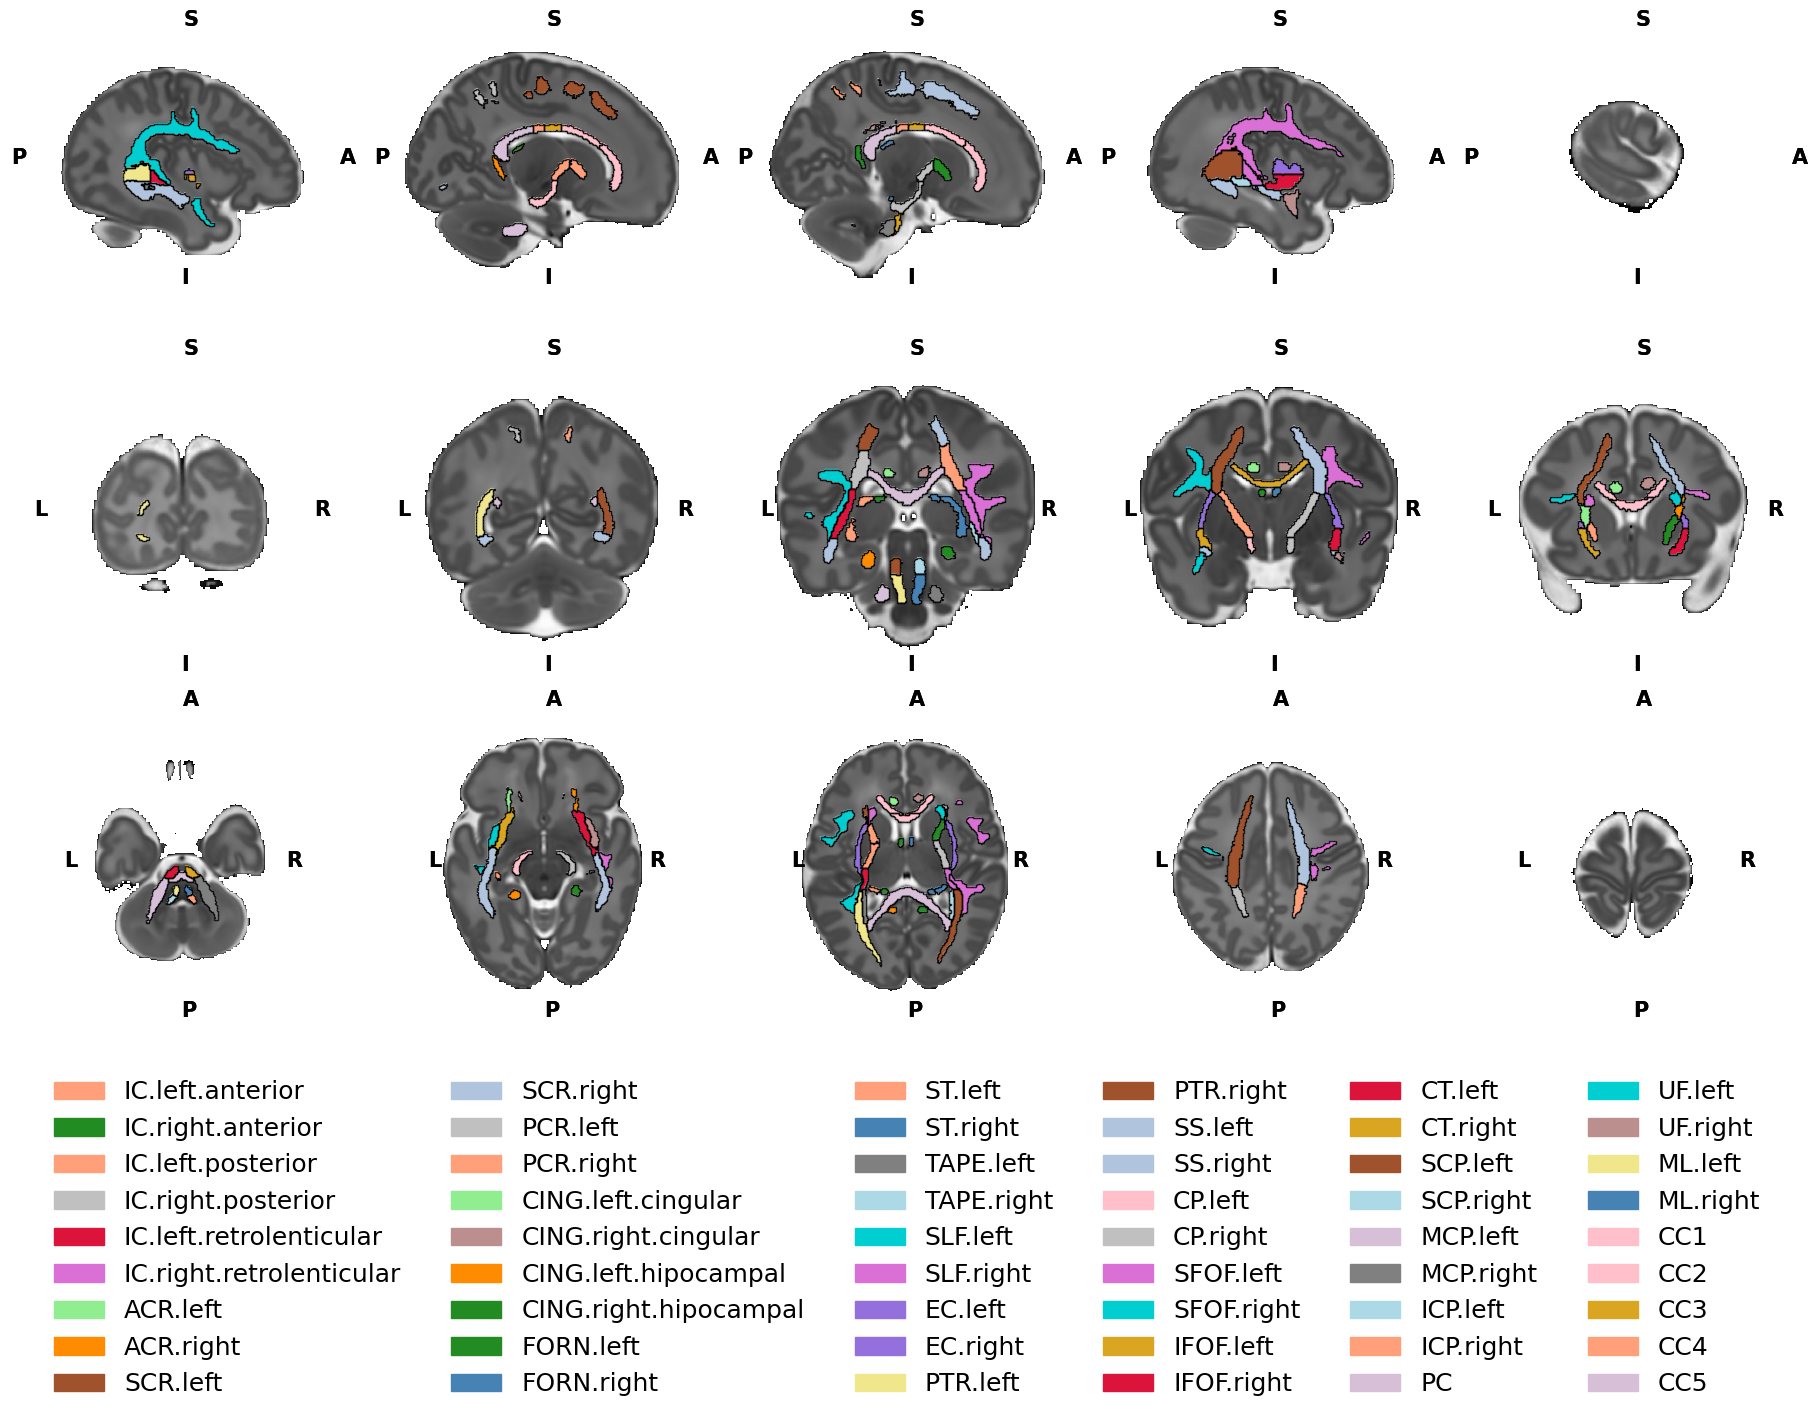

In [10]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4,5)
row1 = [fig.add_subplot(gs[0,i]) for i in range(5)]
row2 = [fig.add_subplot(gs[1,i]) for i in range(5)]
row3 = [fig.add_subplot(gs[2,i]) for i in range(5)]
row4 = fig.add_subplot(gs[3,:])
row4.set_axis_off()
tract_legend = {int(k.replace('wm_','')):v['abbr'] for k,v in data_preprocessing.Diffusion.WM_parcellation.get_wm_parcellation().items()}
atlas_slices = [int(i) for i in np.linspace(50,180,5)]
axes = np.array([row1,row2,row3])
# axes = np.array([row1])
for map_view,row in zip(['sagittal','coronal','axial'],range(axes.shape[0])):
    for atlas_slice,ax in zip(atlas_slices,axes[row,:]):
        _,_ = visualisation.Brainmap.plot_segmentation(
            atlas_file=T2_file,
            map_view = [map_view],
            atlas_slice=atlas_slice,
            T2=True,background_value=1,
            cmap='gray',
            axes=ax)
        # _,_ = visualisation.Brainmap.plot_segmentation(
        #     atlas_file=drawem_parcellation,
        #     map_view = [map_view],
        #     regions_to_hide=[i for i in range(88)],
        #     atlas_slice=atlas_slice,
        #     outline_alpha=0.4,
        #     outline_colour='green',
        #     axes=ax)
        
        _,_ = visualisation.Brainmap.plot_segmentation(
            atlas_file=WM_parcellation,
            map_view = [map_view],
            atlas_slice=atlas_slice,
            plot_values_threshold=0.95,
            cb_title='$1-p_{val}$',
            cb_orientation='horizontal',
            cmap='tab20',
            label_legend=tract_legend,
            outline_label_legends=False,
            label_legend_axis=row4,
            label_legend_loc='upper center',
            label_legend_bbox_to_anchor=None,
            label_legend_fontsize=18,
            axes=ax,fig=fig)
plt.tight_layout()
fig.savefig('tract_plot.png',dpi=300)
# fig.savefig('tract_plot.pdf')

# Visualising lobes

In [4]:
T2_file = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-mean-T2.nii.gz'
drawem_parcellation = '../dataset/visualise/wm_parcellation/parcellation_maps_05mm/reference-05mm-dHCP-structure-parcellation.nii.gz'

In [5]:
lobe_only_legend = {int(k.replace('Imperial ','')):v['abbr'] for k,v in data_preprocessing.Volumes.Imperial.get_Imperial_legends(grouping=['lobe','hemisphere','gmwm2gether']).items() if v['abbr'] is not None}

In [6]:
plot_val = {k:p for k,p in zip(range(1,88),np.random.random(87))}

In [7]:
mask = {k:p for k,p in zip(range(1,88),np.random.random(87))}

In [8]:
lobe_only_val = {k:1 if v=='temporal' else 2 if v=='occipital' else 3 if v=='parietal' else 4 for k,v in lobe_only_legend.items()}

In [9]:
remove_regions = [int(k.replace('Imperial ','')) for k,v in data_preprocessing.Volumes.Imperial.get_Imperial_legends(grouping=['lobe','hemisphere','gmwm2gether']).items() if v['abbr'] is None]

In [10]:
lobe_only_legend_colours = {k:'yellow' if v=='temporal' else 'red' if v=='occipital' else 'blue' if v=='parietal' else 'purple' for k,v in lobe_only_legend.items()}

In [26]:
current = time.time()

136.67034888267517


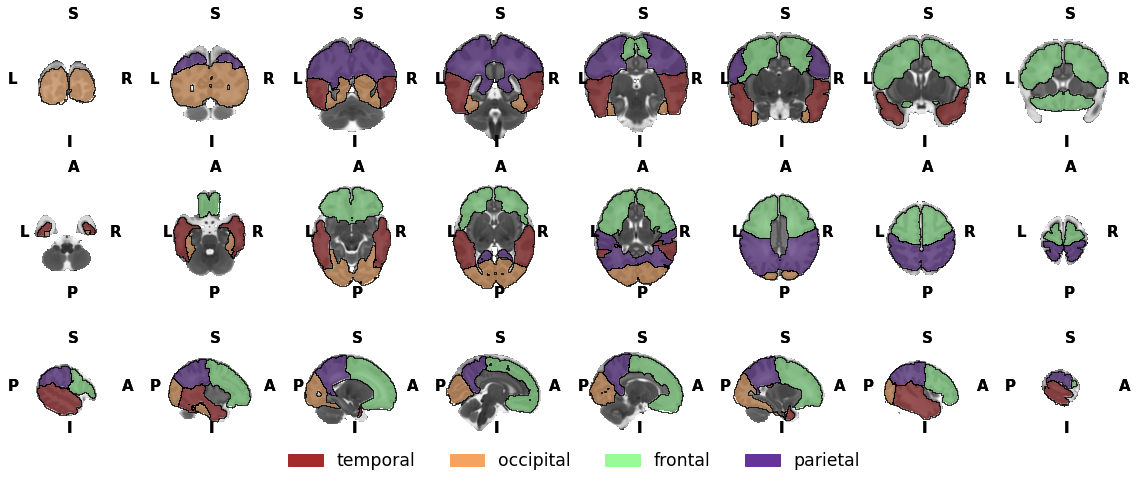

In [84]:
begin=time.time()
fig,axes = plt.subplots(3,8,figsize=(20,8))

for ax,atlas_slice in zip(axes[0,:],np.linspace(40,180,8)):
    _,_ = visualisation.Brainmap.plot_segmentation(
        atlas_slice=int(atlas_slice),
        map_view=['coronal'],
        atlas_file=T2_file,T2=True,cmap='gray',axes=[ax],background_value=1)
    _,_ = visualisation.Brainmap.plot_segmentation(
            atlas_file=drawem_parcellation,
            label_legend=lobe_only_legend,
            map_view=['coronal'],
            atlas_slice = int(atlas_slice),legends=False,axes=[ax],image_alpha=.55)
for ax,atlas_slice in zip(axes[1,:],np.linspace(40,180,8)):
    _,_ = visualisation.Brainmap.plot_segmentation(
        atlas_slice=int(atlas_slice),
        map_view=['axial'],
        atlas_file=T2_file,T2=True,cmap='gray',axes=[ax],background_value=1)
    _,_ = visualisation.Brainmap.plot_segmentation(
            atlas_file=drawem_parcellation,
            label_legend=lobe_only_legend,
            map_view=['axial'],
            atlas_slice = int(atlas_slice),legends=False,axes=[ax],image_alpha=.55)
for ax,atlas_slice in zip(axes[2,:],np.linspace(30,180,8)):
    _,_ = visualisation.Brainmap.plot_segmentation(
        atlas_slice=int(atlas_slice),
        map_view=['sagittal'],
        atlas_file=T2_file,T2=True,cmap='gray',axes=[ax],background_value=1)
    if atlas_slice == 180:
        _,_ = visualisation.Brainmap.plot_segmentation(
                atlas_file=drawem_parcellation,
                label_legend=lobe_only_legend,
                map_view=['sagittal'],
                atlas_slice = int(atlas_slice),legends=True,axes=[ax],
#                 label_legend_axis=legend_ax,
                label_legend_loc='upper center',
                label_legend_bbox_to_anchor=(-4,-0,0.75,0),
                label_legend_ncol=4,
                label_legend_fontsize='xx-large',
                image_alpha=.55)
    else:
        _,_ = visualisation.Brainmap.plot_segmentation(
                atlas_file=drawem_parcellation,
                label_legend=lobe_only_legend,
                map_view=['sagittal'],
                atlas_slice = int(atlas_slice),legends=False,axes=[ax],
                image_alpha=.55)
        
fig.savefig('asd_lobe_volumes_parcellation.png',dpi=300)
print(time.time()-begin)